# Data analisys by me - Paweł Hadam

## Imports

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Open csv file with custom headers

In [2]:
tips2 = pd.read_csv('crx.data', names = ["text1","num1","num2","text2","text3","text4","text5","num3",
                                                       "text6","text7","num4","text8","text9","num5","num6","sign"])

## Print random data analisys

In [3]:
print("Number of uniques:", tips2.nunique())
print("\nCount groupped text1:", tips2.groupby('text1')['text1'].count())
print("\nMin groupped text1:", tips2.groupby('text1')['num1'].min())
print("\nMax groupped text1:", tips2.groupby('text1')['num1'].max())
print("\nStd Num3 groupped text1:",  tips2.groupby('text1')['num3'].std())
print("\nMean Num3 groupped text1:", tips2.groupby('text1')['num3'].mean())

Number of uniques: text1      3
num1     350
num2     215
text2      4
text3      4
text4     15
text5     10
num3     132
text6      2
text7      2
num4      23
text8      2
text9      3
num5     171
num6     240
sign       2
dtype: int64

Count groupped text1: text1
?     12
a    210
b    468
Name: text1, dtype: int64

Min groupped text1: text1
?    20.08
a    15.75
b    13.75
Name: num1, dtype: object

Max groupped text1: text1
?    45.33
a        ?
b        ?
Name: num1, dtype: object

Std Num3 groupped text1: text1
?    1.541210
a    2.553586
b    3.658398
Name: num3, dtype: float64

Mean Num3 groupped text1: text1
?    1.166667
a    1.785857
b    2.446838
Name: num3, dtype: float64


As we see there is more b letters than a leters, also there is 12 ("?") unknown sign values. Thanks to std and mean we can see that num3 values for b letter are bigger than for a letter.

## All values in csv file count

In [4]:
print("\n\nValues count:")
for col in tips2:
    print(tips2[col].value_counts(dropna=False))



Values count:
b    468
a    210
?     12
Name: text1, dtype: int64
?        12
22.67     9
20.42     7
20.67     6
19.17     6
24.50     6
25.00     6
23.58     6
18.83     6
22.50     6
23.25     5
23.00     5
23.08     5
27.83     5
27.67     5
33.17     5
26.67     4
32.33     4
27.25     4
41.17     4
35.17     4
25.17     4
23.50     4
26.17     4
22.92     4
20.75     4
20.00     4
34.17     4
22.08     4
24.58     4
         ..
39.00     1
50.75     1
68.67     1
30.33     1
27.33     1
37.58     1
51.58     1
29.17     1
25.83     1
59.67     1
56.00     1
31.42     1
20.33     1
54.42     1
21.42     1
36.42     1
21.58     1
51.92     1
28.33     1
44.00     1
58.58     1
26.58     1
26.00     1
42.17     1
30.75     1
38.75     1
28.08     1
32.92     1
73.42     1
19.75     1
Name: num1, Length: 350, dtype: int64
1.500     21
0.000     19
3.000     19
2.500     19
1.250     16
0.750     16
0.500     15
5.000     14
4.000     12
1.750     12
6.500     12
2.000     10
10.00

We can use above to parse and find all unknown values count. We see what values are more used and which are used rarely.

## Signs in num4 and num3 pairplot

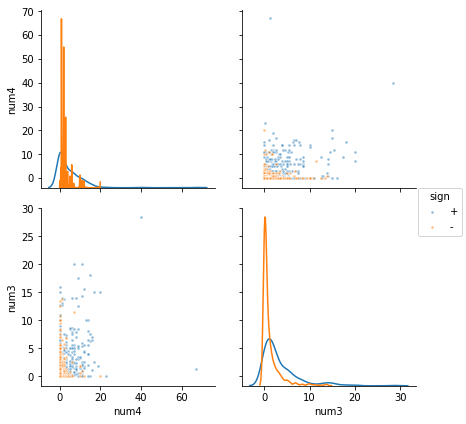

In [5]:
def pairplot(data, vars):
  plot_kws={'alpha': 0.5,
            'marker': '.'}
  sns.pairplot(data.dropna(),
               hue="sign",
               vars=vars,
               diag_kind="kde",
               size=3, plot_kws=plot_kws)
  plt.show()

pairplot(tips2, ["num4", "num3"])

## Added step column

In [6]:
row_count = sum(1 for row in csv.reader(open('crx.data')))
tips2["step"] = [float(i) for i in range(0, row_count)]
tips2.head()

,text1,num1,num2,text2,text3,text4,text5,num3,text6,text7,num4,text8,text9,num5,num6,sign,step
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+,0.0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+,1.0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+,2.0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+,3.0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+,4.0


## Letters in steps

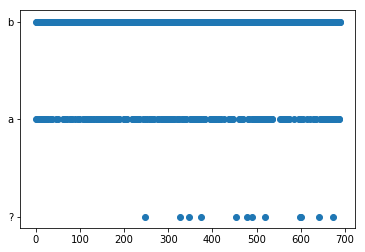

In [7]:
plt.scatter(tips2["step"], tips2["text1"])

As we see at the above chart - unknown values starts to show after first 250 rows of csv file.

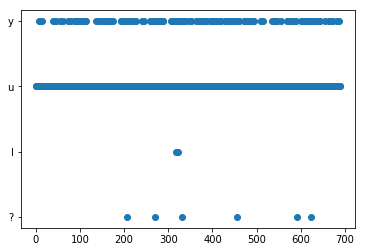

In [9]:
plt.scatter(tips2["step"], tips2["text2"])

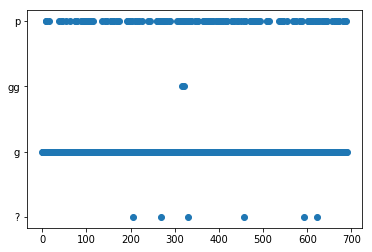

In [10]:
plt.scatter(tips2["step"], tips2["text3"])

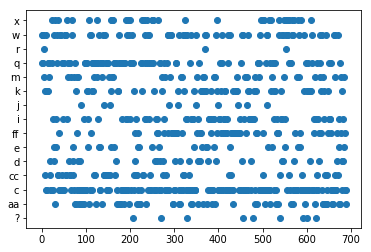

In [11]:
plt.scatter(tips2["step"], tips2["text4"])

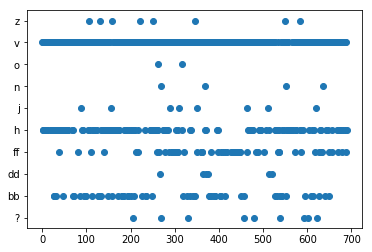

In [12]:
plt.scatter(tips2["step"], tips2["text5"])

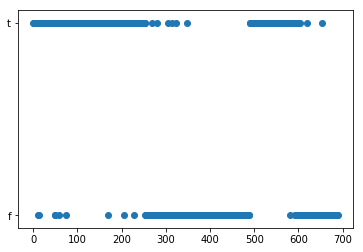

In [13]:
plt.scatter(tips2["step"], tips2["text6"])

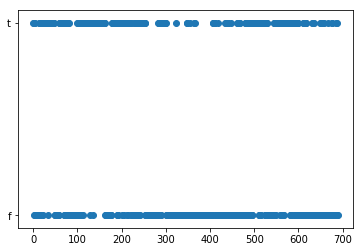

In [14]:
plt.scatter(tips2["step"], tips2["text7"])

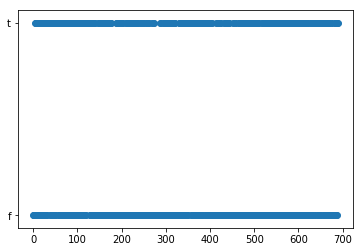

In [15]:
plt.scatter(tips2["step"], tips2["text8"])

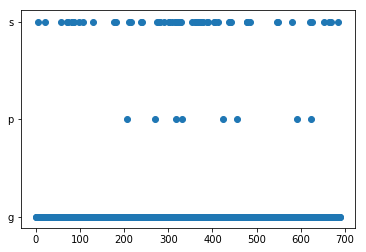

In [16]:
plt.scatter(tips2["step"], tips2["text9"])

## Letters histograms

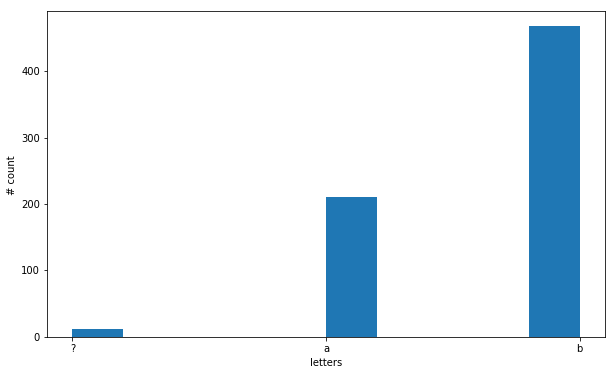

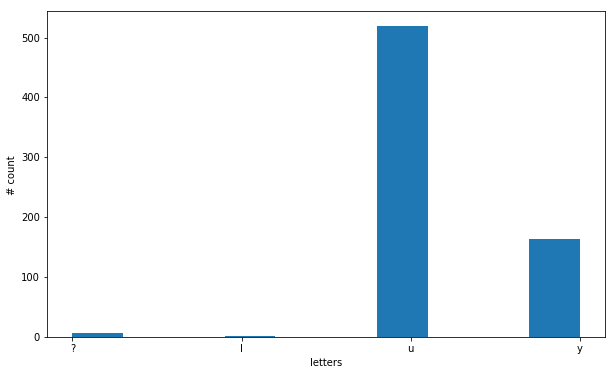

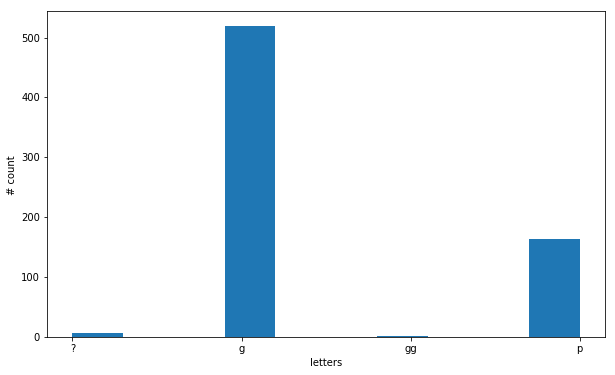

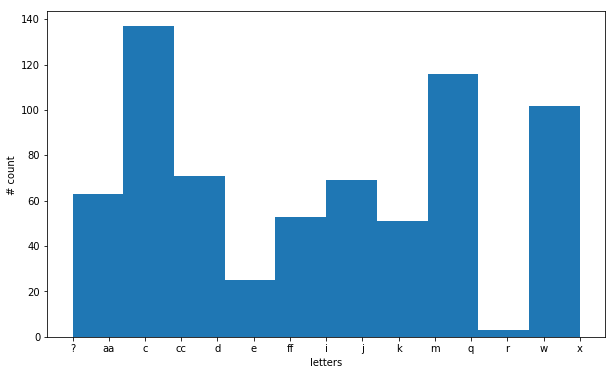

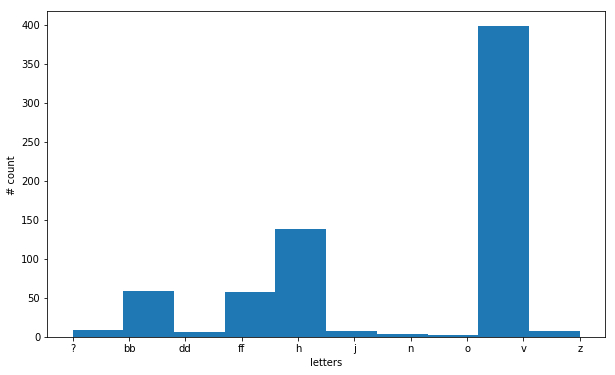

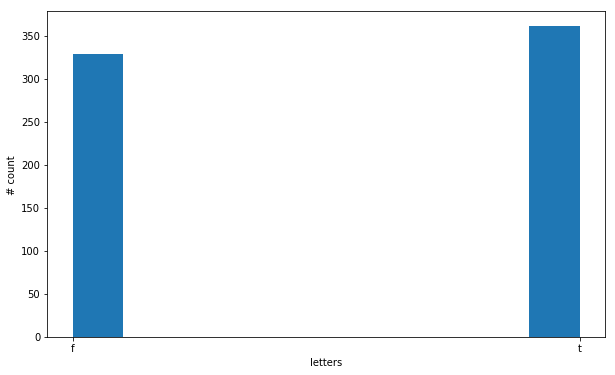

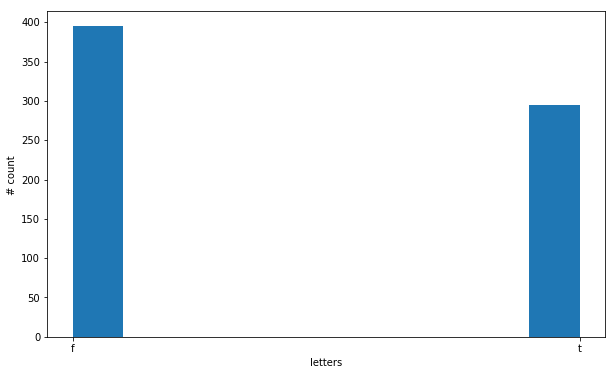

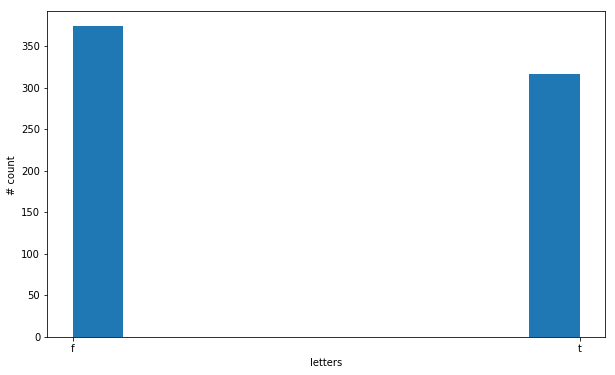

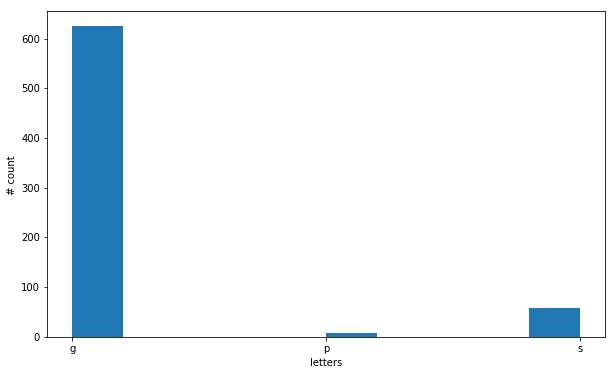

In [17]:
def print_basic_histogram(data):
  plt.figure(figsize=(10,6));
  hist_params = {'normed': False, 'bins': 20, 'alpha': 0.4}
  plt.hist(data.dropna());
  plt.ylabel('# count ')
  plt.xlabel('letters')

print_basic_histogram(tips2["text1"])
print_basic_histogram(tips2["text2"])
print_basic_histogram(tips2["text3"])
print_basic_histogram(tips2["text4"])
print_basic_histogram(tips2["text5"])
print_basic_histogram(tips2["text6"])
print_basic_histogram(tips2["text7"])
print_basic_histogram(tips2["text8"])
print_basic_histogram(tips2["text9"])

## Numbers - steps

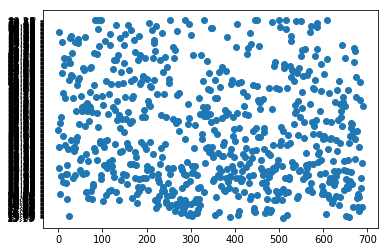

In [18]:
plt.scatter(tips2["step"], tips2["num1"])

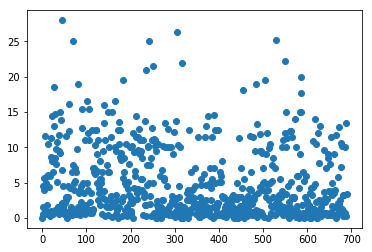

In [19]:
plt.scatter(tips2["step"], tips2["num2"])

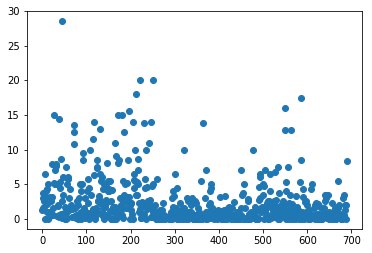

In [20]:
plt.scatter(tips2["step"], tips2["num3"])

From above charts we can easily guess mean values of nums.

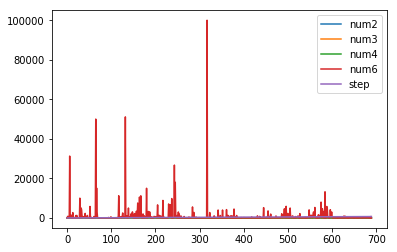

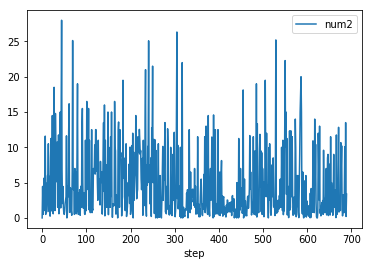

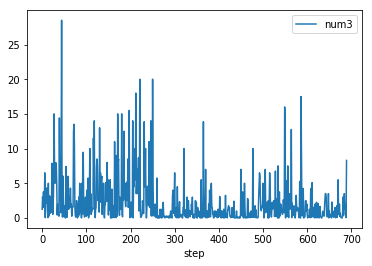

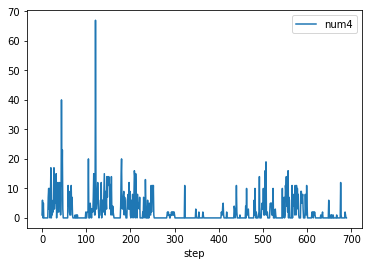

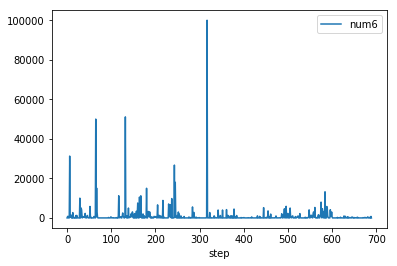

In [21]:
tips2.plot()
tips2.plot(x="step", y="num2")
tips2.plot(x="step", y="num3")
tips2.plot(x="step", y="num4")
tips2.plot(x="step", y="num6")

## Signs in step and num3

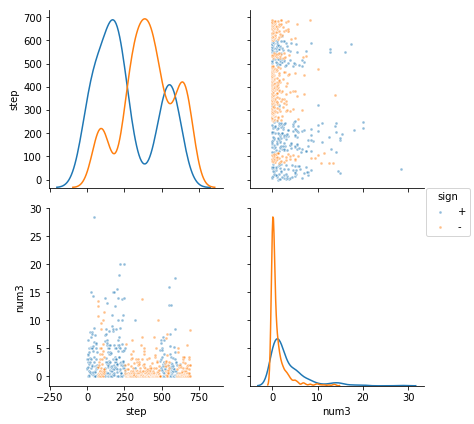

In [22]:
pairplot(tips2, ["step", "num3"])

In above I wanted to present how sign column behaves through steps and also num3 (because why not?).